In [1]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
import json
from desitarget.targetmask import desi_mask
plt.rcParams.update({'font.size': 15})
import desimodel.io

In [2]:
from desitarget.targetmask import desi_mask, obsconditions
from astropy.table import Table

In [3]:
program = 'dark'
path_to_targets = '/global/cfs/projectdirs/desi/target/catalogs/dr8/0.39.0/targets/main/resolve/'+program+'/'
target_files = glob.glob(os.path.join(path_to_targets, "targets*fits"))
print('target files to read:', len(target_files))
target_files.sort()

NameError: name 'program' is not defined

In [ ]:
    
    # Read the first file, only the columns that are useful for MTL
    data = fitsio.FITS(target_files[0], 'r')

In [5]:
output_json = json.load(open('0.38.0/fba_dark_north/qa.json'))

In [11]:
n_sky = list()
for k in output_json.keys():
    n_sky.append(output_json[k]['assign_sky'])

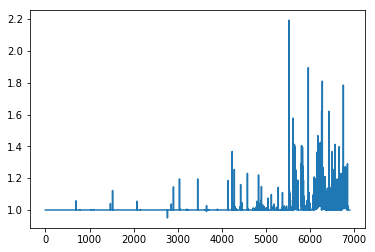

In [16]:
plt.plot(np.array(n_sky)/400.0)

In [53]:
program = "dark_gray"
#program = "bright"
hemisphere = "north"
targetdata = fitsio.read("targets/{}_{}.fits".format(program, hemisphere))
target_mask = desi_mask["BGS_ANY"]

In [54]:
ii = (targetdata['DESI_TARGET']&desi_mask["BGS_ANY"])!=0
print(np.count_nonzero(ii))

6789026


In [55]:
n = len(targetdata)
r = np.random.random(n)
rr = r < 0.001

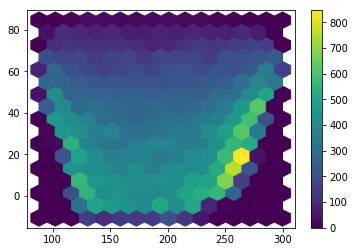

In [56]:
#plt.scatter(, , s=0.1)
plt.hexbin(targetdata['RA'][rr], targetdata['DEC'][rr], gridsize=15,bins=None)
plt.colorbar()

In [57]:
js = open("fba_{}_{}/qa.json".format(program, hemisphere)).read()
qa_data = json.loads(js)

In [58]:
tile_ra = []
tile_dec = []
assign_sky = []
assign_science = []
assign_std = []
tile_id = []

for i in qa_data.keys():
    tile_id.append(i)
    tile_ra.append(qa_data[i]['tile_ra'])
    tile_dec.append(qa_data[i]['tile_dec'])
    assign_sky.append(qa_data[i]['assign_sky'])
    assign_std.append(qa_data[i]['assign_std'])
    assign_science.append(qa_data[i]['assign_science'])

tile_id = np.array(tile_id)
assign_std = np.array(assign_std)
assign_sky = np.array(assign_sky)
assign_science = np.array(assign_science)
tile_ra = np.array(tile_ra)
tile_dec = np.array(tile_dec)

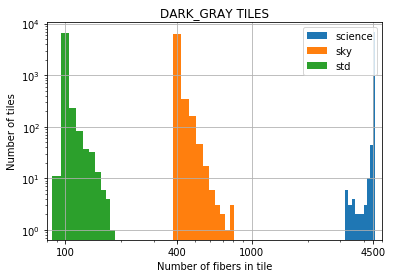

In [59]:
plt.hist(assign_science, label='science')
plt.hist(assign_sky, label='sky')
plt.hist(assign_std, label='std')
plt.loglog()
plt.grid()
ticks = [100, 400, 1000, 4500]
str_ticks = list(map(str,ticks))
_ = plt.xticks(ticks, str_ticks)
plt.xlim([80,5000])
plt.xlabel("Number of fibers in tile")
plt.ylabel("Number of tiles")
plt.legend()
plt.title("{} TILES".format(program.upper()))
plt.savefig("tiles_histogram_{}_{}.pdf".format(program, hemisphere), bbox_inches='tight')

In [60]:
list(map(str, ticks))

['100', '400', '1000', '4500']

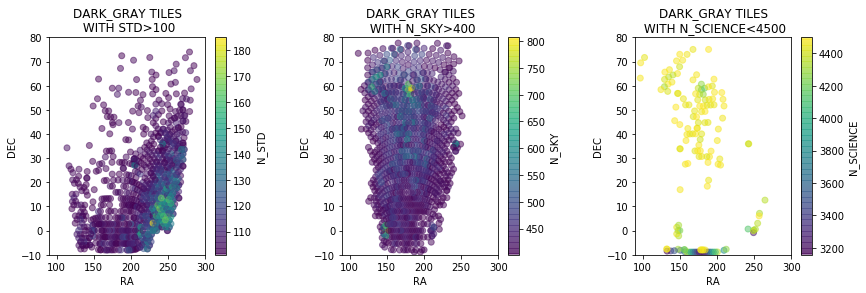

In [61]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
ii = assign_std>100
plt.scatter(tile_ra[ii], tile_dec[ii], c=assign_std[ii], alpha=0.5)
plt.colorbar(label="N_STD")
plt.title("{} TILES\n WITH STD>100".format(program.upper()))
plt.xlabel("RA")
plt.ylabel("DEC")
plt.xlim([90,300])
plt.ylim([-10,80])

plt.subplot(1,3,2)
ii = assign_sky>400
plt.scatter(tile_ra[ii], tile_dec[ii], c=assign_sky[ii], alpha=0.5)
plt.colorbar(label="N_SKY")
plt.title("{} TILES\n WITH N_SKY>400".format(program.upper()))
plt.xlabel("RA")
plt.ylabel("DEC")
plt.xlim([90,300])
plt.ylim([-10,80])


plt.subplot(1,3,3)
ii = assign_science<4500
plt.scatter(tile_ra[ii], tile_dec[ii], c=assign_science[ii], alpha=0.5)
plt.colorbar(label="N_SCIENCE")
plt.title("{} TILES\n WITH N_SCIENCE<4500".format(program.upper()))
plt.xlabel("RA")
plt.ylabel("DEC")
plt.xlim([90,300])
plt.ylim([-10,80])

plt.subplots_adjust(wspace=0.5)
plt.savefig("tiles_distribution_{}_{}.pdf".format(program, hemisphere), bbox_inches='tight')